In [199]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import tree
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.utils import np_utils
from keras import backend as K


from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reference: https://www.kaggle.com/jamesleslie/titanic-neural-network-for-beginners

In [200]:
#Importing data into google Colab using Github raw content
#reference : https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92
# dataset_url = "https://raw.githubusercontent.com/soumoks/Titanic-Kaggle-Competition/master/cleaned_train.csv"
df = pd.read_csv('cleaned_train_test.csv',index_col='PassengerId')

In [201]:
df

,Sex,Title,AgeGroup,Fare,Relatives,Embarked,Pclass,Survived
PassengerId,,,,,,,,
1,-0.743497,-0.715617,0.353004,-1.248109,0.073352,-0.603436,0.841916,0.0
2,1.344995,0.179930,0.353004,1.124265,0.073352,0.927373,-1.546098,1.0
3,1.344995,1.075478,-1.091002,-0.457318,-0.558346,-0.603436,0.841916,1.0
4,1.344995,0.179930,0.353004,1.124265,0.073352,-0.603436,-1.546098,1.0
5,-0.743497,-0.715617,0.353004,-0.457318,-0.558346,-0.603436,0.841916,0.0
...,...,...,...,...,...,...,...,...
1305,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,-0.603436,0.841916,NaN
1306,1.344995,2.866573,0.353004,1.915057,-0.558346,0.927373,-1.546098,NaN
1307,-0.743497,-0.715617,0.353004,-1.248109,-0.558346,-0.603436,0.841916,NaN


In [202]:
labels = df['Survived']

In [203]:
labels = labels[:891]

In [204]:
labels = labels.astype('int')

In [205]:
labels

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int32

In [206]:
df_train = df[:891]

In [207]:
df_train = df_train.drop(['Survived'],axis=1)

In [208]:
df_train

,Sex,Title,AgeGroup,Fare,Relatives,Embarked,Pclass
PassengerId,,,,,,,
1,-0.743497,-0.715617,0.353004,-1.248109,0.073352,-0.603436,0.841916
2,1.344995,0.179930,0.353004,1.124265,0.073352,0.927373,-1.546098
3,1.344995,1.075478,-1.091002,-0.457318,-0.558346,-0.603436,0.841916
4,1.344995,0.179930,0.353004,1.124265,0.073352,-0.603436,-1.546098
5,-0.743497,-0.715617,0.353004,-0.457318,-0.558346,-0.603436,0.841916
...,...,...,...,...,...,...,...
887,-0.743497,3.762120,-1.091002,-0.457318,-0.558346,-0.603436,-0.352091
888,1.344995,1.075478,0.353004,0.333474,-0.558346,-0.603436,-1.546098
889,1.344995,1.075478,0.353004,0.333474,1.336749,-0.603436,0.841916


In [239]:
df_test = df[891:]

In [240]:
df_test

,Sex,Title,AgeGroup,Fare,Relatives,Embarked,Pclass,Survived
PassengerId,,,,,,,,
892,-0.743497,-0.715617,0.353004,-1.248109,-0.558346,2.458182,0.841916,NaN
893,1.344995,0.179930,1.797009,-1.248109,0.073352,-0.603436,0.841916,NaN
894,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,2.458182,-0.352091,NaN
895,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,-0.603436,0.841916,NaN
896,1.344995,0.179930,0.353004,-0.457318,0.705051,-0.603436,0.841916,NaN
...,...,...,...,...,...,...,...,...
1305,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,-0.603436,0.841916,NaN
1306,1.344995,2.866573,0.353004,1.915057,-0.558346,0.927373,-1.546098,NaN
1307,-0.743497,-0.715617,0.353004,-1.248109,-0.558346,-0.603436,0.841916,NaN


In [241]:
df_test = df_test.drop(['Survived'],axis=1)

In [242]:
df_test

,Sex,Title,AgeGroup,Fare,Relatives,Embarked,Pclass
PassengerId,,,,,,,
892,-0.743497,-0.715617,0.353004,-1.248109,-0.558346,2.458182,0.841916
893,1.344995,0.179930,1.797009,-1.248109,0.073352,-0.603436,0.841916
894,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,2.458182,-0.352091
895,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,-0.603436,0.841916
896,1.344995,0.179930,0.353004,-0.457318,0.705051,-0.603436,0.841916
...,...,...,...,...,...,...,...
1305,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,-0.603436,0.841916
1306,1.344995,2.866573,0.353004,1.915057,-0.558346,0.927373,-1.546098
1307,-0.743497,-0.715617,0.353004,-1.248109,-0.558346,-0.603436,0.841916


In [213]:
#### Preprocessing is required for neural networks to convert it into a single dimensional array
#might not be required based on the below article
# https://www.kaggle.com/jamesleslie/titanic-neural-network-for-beginners

In [224]:
model = Sequential()

In [225]:
df_train.shape[1]

7

In [227]:
model.add(Dense(8, activation='relu', input_shape=(7,)))
# model.add(Dense(512, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # output layer
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [228]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_39 (Dense)             (None, 8)                 72        
_________________________________________________________________
dropout_9 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [229]:
df_train.shape

(891, 7)

In [230]:
df_test.shape

(418, 7)

In [231]:
labels.shape

(891,)

In [232]:
history = model.fit(df_train, labels, epochs=200, batch_size=32, validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/200
712/712 [==============================] - 0s 550us/step - loss: 0.8355 - accuracy: 0.4284 - val_loss: 0.8098 - val_accuracy: 0.4078
Epoch 2/200
712/712 [==============================] - 0s 76us/step - loss: 0.7514 - accuracy: 0.5169 - val_loss: 0.7271 - val_accuracy: 0.5866
Epoch 3/200
712/712 [==============================] - 0s 97us/step - loss: 0.7006 - accuracy: 0.6081 - val_loss: 0.6682 - val_accuracy: 0.6313
Epoch 4/200
712/712 [==============================] - 0s 70us/step - loss: 0.6544 - accuracy: 0.6615 - val_loss: 0.6225 - val_accuracy: 0.7430
Epoch 5/200
712/712 [==============================] - 0s 48us/step - loss: 0.6239 - accuracy: 0.6615 - val_loss: 0.5817 - val_accuracy: 0.7374
Epoch 6/200
712/712 [==============================] - 0s 84us/step - loss: 0.5993 - accuracy: 0.7022 - val_loss: 0.5466 - val_accuracy: 0.7542
Epoch 7/200
712/712 [==============================] - 0s 77us/step - loss: 0.5799 - accu

Epoch 57/200
712/712 [==============================] - 0s 71us/step - loss: 0.4281 - accuracy: 0.8244 - val_loss: 0.3676 - val_accuracy: 0.8492
Epoch 58/200
712/712 [==============================] - 0s 69us/step - loss: 0.4355 - accuracy: 0.8090 - val_loss: 0.3678 - val_accuracy: 0.8492
Epoch 59/200
712/712 [==============================] - 0s 99us/step - loss: 0.4258 - accuracy: 0.8230 - val_loss: 0.3674 - val_accuracy: 0.8492
Epoch 60/200
712/712 [==============================] - 0s 90us/step - loss: 0.4311 - accuracy: 0.8104 - val_loss: 0.3667 - val_accuracy: 0.8547
Epoch 61/200
712/712 [==============================] - 0s 91us/step - loss: 0.4259 - accuracy: 0.8132 - val_loss: 0.3662 - val_accuracy: 0.8492
Epoch 62/200
712/712 [==============================] - 0s 79us/step - loss: 0.4258 - accuracy: 0.8188 - val_loss: 0.3649 - val_accuracy: 0.8436
Epoch 63/200
712/712 [==============================] - 0s 73us/step - loss: 0.4327 - accuracy: 0.8146 - val_loss: 0.3652 - val_ac

712/712 [==============================] - 0s 63us/step - loss: 0.4166 - accuracy: 0.8315 - val_loss: 0.3626 - val_accuracy: 0.8436
Epoch 114/200
712/712 [==============================] - 0s 71us/step - loss: 0.4175 - accuracy: 0.8315 - val_loss: 0.3644 - val_accuracy: 0.8380
Epoch 115/200
712/712 [==============================] - 0s 73us/step - loss: 0.4169 - accuracy: 0.8258 - val_loss: 0.3642 - val_accuracy: 0.8436
Epoch 116/200
712/712 [==============================] - 0s 53us/step - loss: 0.4084 - accuracy: 0.8272 - val_loss: 0.3640 - val_accuracy: 0.8436
Epoch 117/200
712/712 [==============================] - 0s 78us/step - loss: 0.4153 - accuracy: 0.8287 - val_loss: 0.3655 - val_accuracy: 0.8436
Epoch 118/200
712/712 [==============================] - 0s 78us/step - loss: 0.4235 - accuracy: 0.8174 - val_loss: 0.3644 - val_accuracy: 0.8380
Epoch 119/200
712/712 [==============================] - 0s 57us/step - loss: 0.4075 - accuracy: 0.8301 - val_loss: 0.3640 - val_accuracy:

712/712 [==============================] - 0s 36us/step - loss: 0.3981 - accuracy: 0.8301 - val_loss: 0.3630 - val_accuracy: 0.8436
Epoch 170/200
712/712 [==============================] - 0s 36us/step - loss: 0.4212 - accuracy: 0.8301 - val_loss: 0.3633 - val_accuracy: 0.8492
Epoch 171/200
712/712 [==============================] - 0s 68us/step - loss: 0.4191 - accuracy: 0.8272 - val_loss: 0.3653 - val_accuracy: 0.8380
Epoch 172/200
712/712 [==============================] - 0s 76us/step - loss: 0.4068 - accuracy: 0.8258 - val_loss: 0.3640 - val_accuracy: 0.8492
Epoch 173/200
712/712 [==============================] - 0s 57us/step - loss: 0.4221 - accuracy: 0.8315 - val_loss: 0.3632 - val_accuracy: 0.8492
Epoch 174/200
712/712 [==============================] - 0s 82us/step - loss: 0.4115 - accuracy: 0.8244 - val_loss: 0.3642 - val_accuracy: 0.8492
Epoch 175/200
712/712 [==============================] - 0s 73us/step - loss: 0.4134 - accuracy: 0.8287 - val_loss: 0.3642 - val_accuracy:

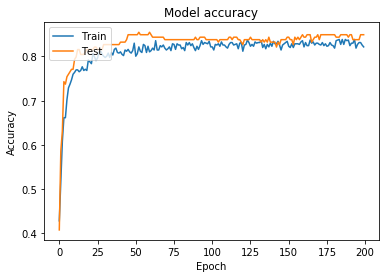

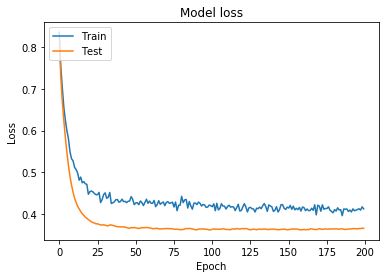

In [233]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [53]:
history.history

{'val_loss': [0.45177514076898884,
  0.39309358729996496,
  0.3740252755873696,
  0.3652110329553402,
  0.3563672801968772,
  0.35392551981537035,
  0.34473078826952247,
  0.3452646667397888,
  0.34240764562644105,
  0.3370400592268512,
  0.3379396353354001,
  0.3333733594617364,
  0.33279918841809536,
  0.33350712194123083,
  0.3290824200021488,
  0.3299709251306576,
  0.3320056831037532,
  0.3290596117353972,
  0.3278792289881733,
  0.3303832261089506,
  0.32796231136974674,
  0.32636776424986025,
  0.329092842906547,
  0.32913270884053003,
  0.3281798122981407,
  0.3282461379493415,
  0.3259411024647718,
  0.3271059303143837,
  0.3284536605107718,
  0.32494979122830503,
  0.32867146612212644,
  0.32910052433027237,
  0.329046291512484,
  0.33077548494219117,
  0.3294099592629758,
  0.3341181107573003,
  0.32944817241676694,
  0.32757065982125994,
  0.32890888282706615,
  0.3311065003359118,
  0.3301062538137649,
  0.32990075747727016,
  0.33051564099069414,
  0.33295640124622006,
  

In [243]:
df_test['Survived'] = model.predict(df_test)

In [244]:
df_test.describe()

,Sex,Title,AgeGroup,Fare,Relatives,Embarked,Pclass,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.015955,-0.027888,-0.037361,0.006184,-0.027901,0.107035,-0.035022,0.398984
std,1.005864,0.949229,0.991127,1.038673,0.959595,1.049394,1.005160,0.331033
min,-0.743497,-0.715617,-2.535007,-1.248109,-0.558346,-0.603436,-1.546098,0.000210
25%,-0.743497,-0.715617,-1.091002,-1.248109,-0.558346,-0.603436,-1.546098,0.120028
50%,-0.743497,-0.715617,0.353004,0.333474,-0.558346,-0.603436,0.841916,0.261239
75%,1.344995,0.851591,0.353004,1.124265,0.073352,0.927373,0.841916,0.698427
max,1.344995,3.762120,3.241014,2.705848,5.758637,2.458182,0.841916,0.994697


In [245]:
df_test['Survived'] = df_test['Survived'].apply(lambda x: round(x,0)).astype('int')

In [246]:
df_test

,Sex,Title,AgeGroup,Fare,Relatives,Embarked,Pclass,Survived
PassengerId,,,,,,,,
892,-0.743497,-0.715617,0.353004,-1.248109,-0.558346,2.458182,0.841916,0
893,1.344995,0.179930,1.797009,-1.248109,0.073352,-0.603436,0.841916,1
894,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,2.458182,-0.352091,0
895,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,-0.603436,0.841916,0
896,1.344995,0.179930,0.353004,-0.457318,0.705051,-0.603436,0.841916,1
...,...,...,...,...,...,...,...,...
1305,-0.743497,-0.715617,-1.091002,-0.457318,-0.558346,-0.603436,0.841916,0
1306,1.344995,2.866573,0.353004,1.915057,-0.558346,0.927373,-1.546098,1
1307,-0.743497,-0.715617,0.353004,-1.248109,-0.558346,-0.603436,0.841916,0


In [247]:
results = df_test.loc[:,['Survived']]

In [248]:
type(results)

pandas.core.frame.DataFrame

In [250]:
results.to_csv('results_NN.csv')

#### This results in a 77% accuracy in Kaggle. Let's try to improve the accuracy with GridSearchCV

In [169]:
from sklearn.model_selection import GridSearchCV

In [256]:
# Trying to find the optimum number of hidden layers

In [259]:
def create_model():
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(7,)))
    # model.add(Dense(512, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # output layer
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [263]:
#create model
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [16, 32, 64]
epochs = [50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# search the grid
grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=2)
grid_result = grid.fit(df_train, labels)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] batch_size=16, epochs=50 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......................... batch_size=16, epochs=50, total=   6.4s
[CV] batch_size=16, epochs=50 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.3s remaining:    0.0s


[CV] ......................... batch_size=16, epochs=50, total=   6.1s
[CV] batch_size=16, epochs=50 ........................................
[CV] ......................... batch_size=16, epochs=50, total=   6.3s
[CV] batch_size=16, epochs=50 ........................................
[CV] ......................... batch_size=16, epochs=50, total=   6.3s
[CV] batch_size=16, epochs=50 ........................................
[CV] ......................... batch_size=16, epochs=50, total=   6.4s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=  11.2s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=  10.5s
[CV] batch_size=16, epochs=100 .......................................
[CV] ........................ batch_size=16, epochs=100, total=  11.2s
[CV] batch_size=16, epochs=100 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.9min finished


In [264]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.810313 using {'batch_size': 64, 'epochs': 50}
0.806949 (0.029487) with: {'batch_size': 16, 'epochs': 50}
0.805850 (0.021938) with: {'batch_size': 16, 'epochs': 100}
0.808091 (0.022766) with: {'batch_size': 32, 'epochs': 50}
0.803597 (0.019401) with: {'batch_size': 32, 'epochs': 100}
0.810313 (0.015784) with: {'batch_size': 64, 'epochs': 50}
0.801343 (0.012659) with: {'batch_size': 64, 'epochs': 100}
